# Livrable 1 & 2 : Équipe 2
Willy Carlot(Chef de projet), Corentin Le Nozahic, Leo Vauthier, Ilias Tragha
---



# Livrable 1 : modélisation
## Contexte

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptees à différents types de territoires.

Notre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, Nous avons réalisés plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Nous faisons partie de l’équipe mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer notre activité.


Autrement dit, dans une ère de transition écologie,réduire les émissions de gaz à effet de serre, la congestion urbaine et l'optimisation des ressources liés à la mobilité des personnes et des marchandises sont des defis cruciaux.

Notre structure **CESICDP**, proposons une solution d'optimisation des tournées de véhicules pour minimiser les distances parcourues, réduire les coûts logistiques et diminuer l'impact environnemental.

## Objectif

L'objectif de ce projet est de calculer des tournées optimales pour un ou plusieurs véhicules visitant un ensemble de villes avant de retourner au dépot initial, tout en minimisant la distance total.


## Modélisation du problème

Dans l’objectif de limiter les déplacements et la consommation des véhicules, il est nécessaire de modéliser notre problème. Afin de se rapprocher le plus possible de la réalité dans nos résultats, nous avons choisi de représenter, sous la forme d’un graphe $G = (V, E)$, la situation d’une ville connue, **Rouen**, avec :

- $V$ : l’ensemble des **sommets**, représentant les intersections de la ville ;
- $E$ : l’ensemble des **arêtes**, représentant les routes entre ces intersections.

*Dans le but d'évaluer, de prouver et de déterminer les limites de notre solution sur des villes plus ou moins denses, avec un grand ou un petit nombre de sommets, nous serons probablement amenés à générer artificiellement des villes.*

Sur ce graphe $G$, les intersections sont donc représentées sous forme de sommets, tandis que les routes figureront sous forme d’arêtes.

Dans le cadre de l’amélioration continue, nous avons choisi de prendre en compte deux contraintes :

- **$C1$** : la distance entre les intersections, exprimée par une **pondération** $w : E \rightarrow \mathbb{R}_+$ associée à chaque arête du graphe. De plus, certaines routes peuvent être plus coûteuses ou interdites (par exemple, travaux ou routes bloquées). 

- **$C2$** : la prise en compte d’un **nombre multiple de camions** $n_V$, permettant de faire plusieurs sous-tournées multi-tours plutôt qu’une seule tournée unique.

Ces contraintes ont été choisies car elles sont les plus importantes à prendre en compte vis-à-vis d'une situation réelle. En effet, les routes barrées et les routes avec beaucoup de trafic sont très communes dans les grandes villes. La plupart (voire l'ensemble) des outils de génération d’itinéraires prennent en compte ces contraintes. Nous avons donc estimé que les $C1$ et $C2$ définies sont les plus intéressantes à mettre en place.

L’objectif de cette étude est de se rapprocher le plus possible d’une **solution viable** (solution qui s’exécute dans un temps raisonnable) et **optimisée** (qui minimise la **somme totale des arêtes parcourues** par l’ensemble des véhicules), permettant à un ensemble $n_V$ de véhicules de visiter **l’ensemble des points marqués** (nœuds à desservir) $M$, tout en revenant au point de départ (dépôt) $D$.

Dans le cadre de notre étude, nous cherchons un ensemble de sommets :

$TV_0, TV_1, \dots, TV_n$

décrivant les routes suivies par chaque véhicule, que nous notons globalement $TV$.

Dans le cadre de cette étude, nous représentons le problème comme suit :

- $n_V$ : le nombre de véhicules disponibles ;
- $G = (V, E)$, avec $w : E \rightarrow \mathbb{R}_+$ la fonction de coût associée aux distances ;
- $D \subseteq V$ : le dépôt (point de départ et d’arrivée de tous les véhicules) ;
- $M_V \subseteq V$ : l'ensemble des sommets à visiter avec un véhicule pour avoir une solution valide ;
- $TV_n \subseteq V$ : la route du véhicule $n_v \in \{1, ..., n_V\}$, dont la route commence et se termine par son point de départ $D$ ;
- Chaque sommet $M_V \subseteq V \setminus \{D\}$ est visité **exactement une fois** par un unique véhicule (sauf $D$) ;
- $k$ est le cardinal de notre graphe.

### Fonction objective

Nous cherchons un ensemble de tournées $\{TV_1, ..., TV_{n}\}$ tel que :

- $\sum_{k=1}^{n_V} TV_k$ contienne l'ensemble des sommets $M_V$ ;

Et que le coût total $w(i, j)$ :

- $\min \sum_{k=1}^{n_V} \sum_{(i, j) \in TV_k} w(i, j)$ soit minimisé.


## Complexité

### Problème sans contrainte
### Prouver que notre problème est NP-complet (sans contraintes)
#### 1.Montrer que le résultat est vérifiable en un temps polynomiale (sans contraintes)
Il faut que notre problème soit dans NP(Non déterministe polynomiale). Il faut que l'algorithme de vérificarion d'une solution $S_{tsp}$ s'exécute en un temps polynomiale.

Pseudo-algorithme pour $S_{tsp} = \{TV_1, TV_2,...,TV_n \}$

* Longueur de la chaine $O(n)$
* unicite des sommets(points de livraisons)$O(n)$
* lien existant entre chaque couple $O(n)$
* point de départ = point d'arrivée $O(1)$
* verifier cout < k $O(1)$

La complexité de cette alogorithme est de $O(n)$  donc l'instance de solution de notre problème est vérifiable dans un temps polynomiale.

#### 2. Faire la réduction polynomiale de notre Problème vers un problème NP-complet (sans contraintes)

D'après le cycle hamiltonien :
- Le graphe $G$ possède un cycle hamiltonien si et seulement s’il existe un cycle dans $G$ passant par tous les sommets exactement une fois, et ayant une longueur 0(c’est-à-dire, s’il existe une solution à l’instance du problème du voyageur de commerce ).

- S’il existe un cycle qui passe par tous les sommets exactement une fois, et qui a une longueur 0 dans $G$, alors ce cycle ne contient que des arêtes qui étaient présentes à l’origine dans le graphe G. (Les nouvelles arêtes ajoutées dans $G$ ont un poids > 0 et ne peuvent donc pas faire partie d’un cycle de longueur 0.)

S’il existe un cycle hamiltonien dans $G$, alors ce cycle forme un cycle dans $G$ de longueur 0, puisque les poids de toutes ses arêtes est inférieur à $k$.

Il existe donc une solution au problème du voyageur de commerce dans $G$ avec une longueur 0.

Notre problème est celui décrit par William Rowan Hamilton et Thomas Kirkman
Comme étant Le **Problème du voyageur**.Ce problème est réductible polynomialement au problème du *Cycle hamiltonien* car d'après le problème du voyageur :

- Il est possible de transformer notre graphe $G$ comportant l'ensemble des sommets à parcourir, de chercher à parcourir l'ensemble des sommets en revenant au point de départ et de minimiser le coût $w$ de l'ensemble des arrêtes parcourues.

Notre problème est donc au moins aussi difficile que le problème du cycle hamiltonien.

<br>

> *En 1971, l'informaticien et mathématicien Stephan Cook à publié un article dans lequel il montre le premier problème NP-Complet : le problème SAT. <br><br>
C'est à partir de cet ouvrage que Richard M. Karp à démontré la NP-complétude de 21 problèmes dans son article "Reductibility Among Combinatorial Problems" publié en 1972. <br><br>
Le problème du cycle hamiltonien fait partie de ces 21 problèmes, on sait donc qu'il est NP-Complet et que par conséquent notre problème est bien NP-complet.*

<br>

Pour résumer :  
- l'instance de solution de notre problème(sans contraintes) est vérifiable dans un temps polynomiale.
- Notre problème est au moins aussi difficile que le problème TSP.
=> Notre problème est NP-complet et par conséquent NP-difficile


### Problème avec contraintes
### Prouver que notre problème est NP-complet (avec contraintes)
#### 1.Montrer que le résultat est vérifiable en un temps polynomiale (avec contraintes)
Il faut que notre problème(avec contraintes) soit dans NP(Non déterministe polynomiale). Il faut que l'algorithme de vérificarion d'une solution $S_{vrp}$ s'exécute dans un temps polynomiale

Pseudo-algorithme pour $S_{vrp} = \{TV_1, TV_2,...,TV_n \}$

* Longueur des chaines des véhicules additionnés $O(n)$
* unicite des sommets(points de livraisons) $O(n)$
* lien existant entre chaque couple$ $O(n)$
* point de départ = point d'arrivée pour tous les véhicules $O(1)$
* verifier cout $w \le k$ pour tous les véhicules $O(1)$

La complexité de cette alogorithme est de $O(n)$ donc l'instance de solution de notre problème est vérifiable dans un temps polynomiale.

#### 2. Faire la réduction polynomiale de notre problème vers un problème NP-complet (avec contraintes)

Notre problème est une généralisation du problème décrit par William Rowan Hamilton et Thomas Kirkman, connu sous le nom de problème du voyageur (TSP incomplet). Ce problème est réductible polynomialement au problème du cycle hamiltonien.

En effet, d’après les propriétés du TSP :

- Le graphe $G$ possède un cycle hamiltonien si et seulement si il existe un cycle dans $G$ passant par tous les sommets exactement une fois**, et ayant une longueur $w \le k$ (c’est-à-dire, s’il existe une solution à une instance du problème du voyageur de commerce).

- S’il existe un tel cycle, alors il est composé uniquement d’arêtes existant dans le graphe d’origine. En effet, les arêtes ajoutées artificiellement dans $G$ ont un poids de $Big(M)$ (bien supérieur à $k$), elles ne peuvent donc pas appartenir à un cycle de coût total $w \le k$.

Problème de routage de véhicules (VRP) :

- Dans notre cas, le graphe $G$ contient un ensemble de sommets à parcourir, et l’objectif est de revenir au point de départ tout en **minimisant le coût total $w$ des arêtes parcourues.
  
- Contrairement au TSP, nous disposons de plusieurs véhicules. La solution n’est donc pas un seul cycle mais un ensemble de tournées, chacune réalisée par un véhicule, où chaque sommet est visité une seule fois. Cet ensemble de tournées peut être vu comme un ensemble d’instances de TSP, regroupées dans un ensemble $big(VRP)$, où aucun sommet ne figure plus d’une fois.

S’il existe un cycle hamiltonien dans $G$, alors il forme un cycle de longueur $w \le k$, utilisant uniquement des arêtes valides. Cela implique qu’il existe une solution au problème initial avec ce coût.

On sait par ailleurs que le TSP est réductible polynomialement au cycle hamiltonien, et que le VRP généralise le TSP (en y ajoutant la contrainte multi-véhicules et de répartition des sommets).

Donc, **notre problème VRP (incomplet, multi-véhicules) est bien NP-complet**.


#### Conclusion

En conlusion, au cours de cette étude nous avons démontré que notre Problème est bien inclu dans NP-complet et par con même en prennant en compte l'ajout de nos contraintes $C1$ et $C2$.Dans le prochain livrable nous aborderons les méthodes et algorithmes de résolutions possibles pour optimiser le temps de trajet des véhicules de L'ADEME.

# Livrable 2 : Implémentation et exploitation
Une fois le problème modélisé mathématiquement et étude de la complexitée réalisée, nous en avons conclu que notre problème est NP-complet ce qui signifie qu'une instance de solution à notre problème est vérifiable en un temps polynomiale. Le test de l'ensemble des solutions étant trop couteux en temps et en puissance de calcul, il est nécessaire de faire appel à des méta-heuristiques nous permettant de trouver une solution optimale en un temps raisonnable. De nombreuses méta-heurisques existes et notre ploblème est np-complet on peut donc utiliser l'ensemble de méta-heuristiques existantes pour trouver une solution (même si certainement conviennent naturellement plus que d'autres à notre situation). Cependant chaque méta-heurisque va avoir une efficacitée différente en fonction des nombreux facteurs suivants :
- ses paramètres (comme le nombre d’itérations, nombre de véhicule, paramètres intrinsèque à la maté-heuristique, ...),

- les contraintes propres au problème.

- ainsi que les caractéristiques du graphe (nombre de sommets, nombre d’arêtes, pondérations, arêtes bloquées, etc.).


Nous avons donc sélectionnées 3 méta-heuristiques différentes afin de les comparer et en déduire à l'aide d'une etude expérimentale la mata-heuritique la plus proche d'une solution optimal. 

Afin diversifier nos résultats nous avons choisis de sélectionner un algorithme par trajectoire et deux algorithmes par population car notre situation s'y prête plus aisément(les fourmis utilisant cet algorithme pour trouver la route la plus courte jusqu'a la nourriture). Les trois méta-heuristiques retenues sont la recherche avec tabou, l'algorithme génétique et l'algorithme des colonies de fourmis. 

## Modélisation informatique de notre problème
Avant de pouvoir rechercher le meilleur chemin sur un graphe, il est nécessaire de modéliser notre situation sous forme de graphe.
Pour cela, nous avons utilisé les bibliothèques RandomGraph et MapGraph, qui permettent de générer des graphes selon plusieurs paramètres :
- Nombre de sommets
- Probabilité d'arrêtes
- Probabilité de route couteuse
- Probabilité de route barrée
Ces graph sont des objets networksx et sont affichée avec pyplot.

De plus afin d'avoir des graphes réalistes et de nous permettre de faire une étude complètes sur nos solutions La bibliothèque "MapGraph" nous génère un graph entre des villes du mondes avec des distances réelles(à vol d'oiseau). Tandis que "RandomGraph" nous permet de faire varier les situations afin de pouvoir analyser les résultats de notre algorithmes avec de grandes variations des paramètres.

### Génération d'un graphe
On commence par importer les dépendances et générer une seed :

In [2]:
#pip install numpy==1.23.0
#pip install matplotlib
#pip install networkx
#pip install pandas
#pip install geopy
#pip install basemap
#pip install basemap basemap-data-hires
#pip install seaborn


import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

(<module 'numpy' from '/opt/anaconda3/lib/python3.12/site-packages/numpy/__init__.py'>,
 None)

Une fois l'ensemble des biblothèques importés nous avons la possibilité de générer un graph aléatoire et de l'afficher 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


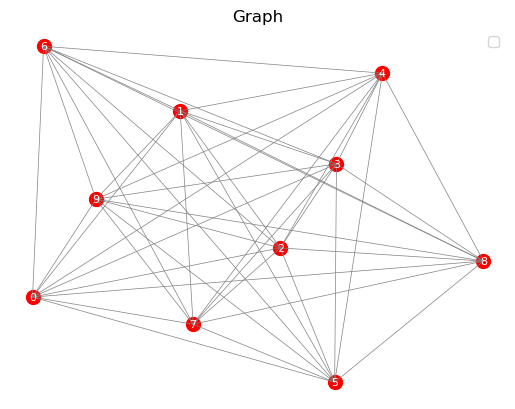

In [7]:
random_graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
random_graph.plot_graph()

De plus nous pouvons générer un graphe entre différentes villes 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


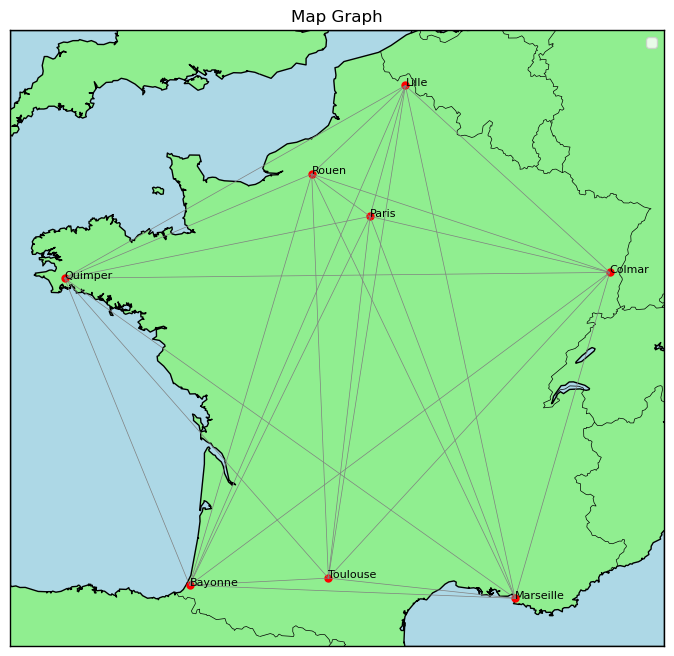

In [8]:
        
cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]

graph = MapGraph(cities=cities,start_city="Rouen")
graph.plot_graph()


### Filtration

Une fois le graphe généré, nous avons la possibilitée de filtrer ce graphe en y ajoutant une probabilité de route barré ainsi que de route couteuse. Les routes barrés sont représentés en **arêtes rouges fines** tandis que les routes conteuses se distinguent par une **arête rouge épaisse**.


Removed 4 edges of 28
Costed 4 edges of 24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


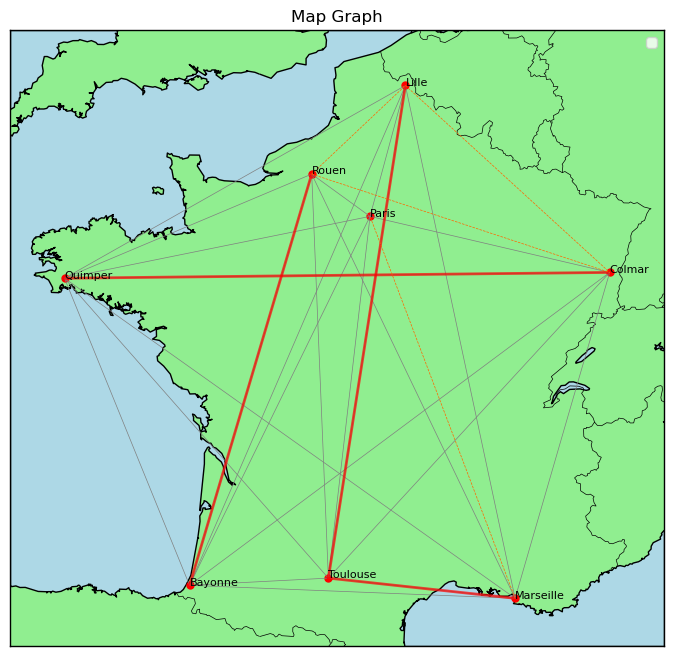

In [9]:
#Filtration
graph.apply_edge_blocking(percentage=20)
graph.apply_edge_costly(percentage=20)

graph.plot_graph()

## Métaheuristique 1 : Algorithme Tabou
### Modélisation algorithmique  
L'algorithme de par trajectoire de recherche avec tabou fonctionne de la manière suivante :  

#### Génération d'une solution initiale aléatoire
L’algorithme commence par créer une solution de départ, choisie aléatoirement ou via une heuristique simple. Cette solution représente un point de départ dans l’espace de recherche.

#### Génération des voisins
À partir de cette solution initiale, on génère un ensemble de solutions voisines. Ces voisins sont obtenus en effectuant des modifications mineures sur la solution actuelle (par exemple, échanger deux éléments, déplacer un nœud, etc.).

#### Évaluation des voisins et comparaison
On évalue chaque solution voisine en fonction de notre fonction de coût ($\min \sum_{k=1}^{n_V} \sum_{(i, j) \in TV_k} w(i, j)$ soit minimisé.
). L’algorithme identifie la meilleure solution parmi ces voisins (c’est-à-dire celle avec la distance la plus courte sur la somme des véhicules).

Ensuite, cette solution est comparée à celles enregistrées dans la liste tabou :

Si cette solution n’est pas dans la liste tabou, ou si elle est meilleure que la meilleure solution globale trouvée jusque-là, alors elle est acceptée comme nouvelle solution courante.

Elle est ensuite ajoutée à la liste tabou, pour éviter qu’elle ne soit choisie à nouveau pendant un certain nombre d’itérations.

#### Mise à jour de la liste tabou
La liste tabou fonctionne comme une file à durée limitée : après un certain nombre d’itérations , les anciennes solutions sont retirés pour laisser place aux nouvelles. Cela permet de préserver la diversité des solutions explorées.

#### Répétition sur n itération
Ce processus est répété pendant un nombre fixé d’itérations n. À chaque itération, le but est soit de trouver une meilleure solution, soit d’éviter de rester bloqué dans un minimum local grâce à l’interdiction temporaire de certaines solutions.

#### Retour de la meilleure solution trouvée
Une fois le nombre d’itérations terminé, l’algorithme renvoie la meilleure solution rencontrée au cours de la recherche. Il ne s’agit pas nécessairement de la dernière solution visitée, mais de la meilleure connue (enregistrée dans la liste tabou).



### implémentation python
### Implémentation Python
En Python, six paramètres ont été définis pour la classe de notre algorithme :
- size_tabou : taille de la **liste tabou**, qui permet à l'algorithme d’éviter de reprendre des chemins déjà empruntés et de favoriser une diversification importante.  
- num_vehicles : nombre de véhicules.  
- min_iterations : nombre minimum d’itérations.  
- max_iterations : nombre maximum d’itérations.  
- convergence_threshold : une fois le nombre minimum d’itérations dépassé, **compte le nombre de fois consécutives** où l’algorithme ne trouve pas de meilleure solution que la précédente (ce paramètre permet, même si le nombre d’itérations est plus grand que le nombre de solutions possibles, d’arrêter l’exécution).


In [10]:
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from utils.plot import Plot
import time  


def time_over_iterations_comparison(graph,algorithms, max_iterations, step = 1, single_plot = True, full_plot = True):
    time_results = {algo.name: [] for algo in algorithms}
    iteration_range = range(1, max_iterations + 1, step)
    for algorithm in algorithms:
        algorithm.convergence_threshold = 0
        for i in iteration_range:
            algorithm.max_iterations = i
            algorithm.min_iterations = i
            algorithm.run()
            time_results[algorithm.name].append(algorithm.execution_time)
            print(f"{algorithm.name} - Iterations: {i} of {max_iterations}, Time: {algorithm.execution_time}s")
        if single_plot:
            single_time_result = {}
            single_time_result[algorithm.name] = time_results[algorithm.name]
            Plot.plot_time_over_iterations_comparison(single_time_result,step)
    if full_plot:
        Plot.plot_time_over_iterations_comparison(time_results,step)

def distance_over_iterations_comparison(graph,algorithms, single_plot = True, full_plot = True, plot_path_single = True, full_path_plot = False):
    algorithms_distance_results = {}
    for algorithm in algorithms:
        algorithm.run()
        algorithms_distance_results[algorithm.name] = algorithm.distance_history
        if single_plot:
            single_distance_results = {}
            single_distance_results[algorithm.name] = algorithm.distance_history
            Plot.plot_distance_over_iterations_comparison(single_distance_results)
    if full_plot:
        Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

# Display results for one algorithm
def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    
# Display results for multiple algorithms

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        start_time = time.time()
        run_algorithm(graph, algorithm)
        end_time = time.time()
        duration = end_time - start_time
        print(f"{algorithm.name} terminé en {duration:.2f} sec.\n")

    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    # graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100




### Etude expérimentale
#### Plan d’expérience
### Tests de performance de l’algorithme tabou
Pour tester l’efficacité de l’algorithme de recherche avec tabou, nous avons défini plusieurs paramètres importants :

- Le nombre de sommets du graphe  
- La probabilité de présence d’arêtes  
- La probabilité de routes bloquées  
- Le nombre d’itérations de l’algorithme  
- La taille de la liste tabou  
- Le nombre de véhicules  

Nous avons généré plusieurs graphes aléatoires en faisant varier ces paramètres, puis lancé l’algorithme sur chacun d’eux pour observer son comportement. Cela nous a permis de tester différentes configurations et d’en mesurer l’impact sur la qualité de la solution trouvée.



#### Etude d'expérience  :
##### Variation du temps en fonction du nombre d'itérations

Tabu Search - Iterations: 1 of 10, Time: 0.0s
Tabu Search - Iterations: 2 of 10, Time: 0.0031914710998535156s
Tabu Search - Iterations: 3 of 10, Time: 0.004010677337646484s
Tabu Search - Iterations: 4 of 10, Time: 0.006633281707763672s
Tabu Search - Iterations: 5 of 10, Time: 0.011023998260498047s
Tabu Search - Iterations: 6 of 10, Time: 0.013766765594482422s
Tabu Search - Iterations: 7 of 10, Time: 0.025124311447143555s
Tabu Search - Iterations: 8 of 10, Time: 0.025676727294921875s
Tabu Search - Iterations: 9 of 10, Time: 0.037240028381347656s
Tabu Search - Iterations: 10 of 10, Time: 0.04028654098510742s


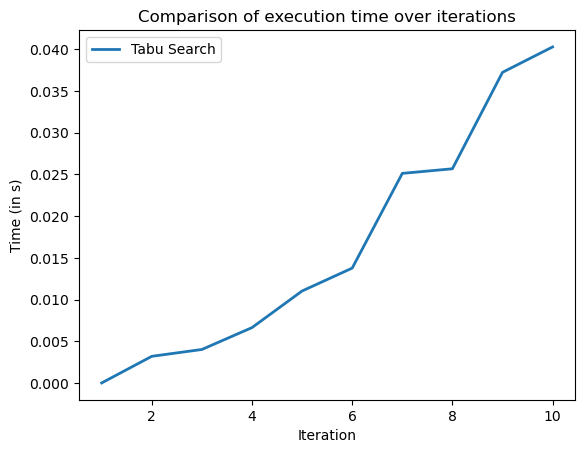

In [ ]:
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=1, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]



# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

time_over_iterations_comparison(graph=graph,algorithms=algorithms, max_iterations=50, step=1, single_plot=False)

#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results



En tracant un graphe du temps d'execution en fonction du nombre d'itération on remarque que notre le temps d'exécution est expodentielle par rapport au nombre d'itération. **Nous voulons donc réduire un maximum le nombre d'itération afin de limiter grandement le temps d'exécution**.

##### Variation du temps en fonction du pourcentage d'arete bloqués

In [17]:
def graph_generator(node=60, minimum_weight=1, maximum_weight=100, blocked_edge_percentage=0, costly_edge_percentage=0):
    # Graph generation
    graph = RandomGraph(node_number=node, min_weight=minimum_weight, max_weight=maximum_weight)
    # Filtration
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)
    return graph


def time_vs_blocked_edges(graph_generator, algorithm_class, blocked_percentages, max_iterations, node_count=60):
    times = []
    for p in blocked_percentages:
        try:
            graph = graph_generator(node=node_count, blocked_edge_percentage=p)
            algorithm = algorithm_class(graph, max_iterations=max_iterations)
            algorithm.convergence_threshold = 0
            algorithm.run()
            print(f"{algorithm.name} - {p}% d'arêtes bloquées : {algorithm.execution_time:.4f} sec")
            times.append(algorithm.execution_time)
        except Exception as e:
            print(f"Erreur à {p}% d'arêtes bloquées : {e}")
            times.append(None) 
    Plot.plot_time_vs_blocked_edges(blocked_percentages, times)


TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]
blocked_percentages = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
time_vs_blocked_edges(
    graph_generator=graph_generator,
    algorithm_class=lambda graph, max_iterations: TABU,
    blocked_percentages=blocked_percentages,
    max_iterations=1000,
    node_count=100  
)


Tabu Search - 0% d'arêtes bloquées : 25.0257 sec
Removed 242 edges of 4950
Tabu Search - 5% d'arêtes bloquées : 35.4936 sec
Removed 485 edges of 4950
Tabu Search - 10% d'arêtes bloquées : 33.2793 sec
Removed 727 edges of 4950
Tabu Search - 15% d'arêtes bloquées : 26.3049 sec
Removed 970 edges of 4950
Tabu Search - 20% d'arêtes bloquées : 26.4357 sec
Removed 1212 edges of 4950
Tabu Search - 25% d'arêtes bloquées : 29.8545 sec
Removed 1455 edges of 4950
Tabu Search - 30% d'arêtes bloquées : 29.3898 sec
Removed 1940 edges of 4950
Tabu Search - 40% d'arêtes bloquées : 33.4192 sec
Removed 2425 edges of 4950


KeyboardInterrupt: 

On remarque que le nombre d'arêtes bloqué impacte grandement le temps d'exécution de notre algorithme tabou de manière expodentielle. **I lfaut donc trouver un moyen de limiter l'instance de solution à l'ensemble des solutions possibles en prennant en compte les arêtes bloquées**

##### Variation du temps en fonction du nombre de sommets

In [13]:

def graph_generator(node=10, minimum_weight=1, maximum_weight=100, blocked_edge_percentage=0, costly_edge_percentage=0):
    # Graph generation
    graph = RandomGraph(node_number=node, min_weight=minimum_weight, max_weight=maximum_weight)
    # Filtration
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)
    return graph


def time_vs_node_count(graph_generator, algorithm_class, node_counts, max_iterations, blocked_edge_percentage=0, costly_edge_percentage=0):
    times = []
    for n in node_counts:
        try:
            graph = graph_generator(
                node=n,
                blocked_edge_percentage=blocked_edge_percentage,
                costly_edge_percentage=costly_edge_percentage
            )
            algorithm = algorithm_class(graph, max_iterations=max_iterations)
            algorithm.convergence_threshold = 0
            algorithm.run()
            print(f"{algorithm.name} - {n} sommets : {algorithm.execution_time:.4f} sec")
            times.append(algorithm.execution_time)
        except Exception as e:
            print(f"Erreur avec {n} sommets : {e}")
            times.append(None)  
    Plot.plot_time_vs_node_count(node_counts, times)

node_counts = [10, 20, 30, 40, 50]  

time_vs_node_count(
    graph_generator=graph_generator,
    algorithm_class=lambda graph, max_iterations: TabuAlgo(graph, max_iterations=max_iterations),
    node_counts=node_counts,
    max_iterations=1000,
    blocked_edge_percentage=10,
    costly_edge_percentage=10
)


Removed 3 edges of 45
Costed 4 edges of 42
2638dd88-5a6c-4f30-b5a5-147abfeda9a8 - 10 sommets : 2.0202 sec
Removed 17 edges of 190
Costed 17 edges of 173
adbb7b3c-0270-4c18-8b48-4309996af254 - 20 sommets : 11.1953 sec
Removed 40 edges of 435
Costed 39 edges of 395
2d6cb336-ef28-43a4-a31c-9c1d878a0c7c - 30 sommets : 53.7541 sec
Removed 74 edges of 780
Costed 70 edges of 706


KeyboardInterrupt: 

Sur ce graphe, on remarque que le nombre de sommets impacte très grandement le temps d'exécution est expodentielle par rapport au nombre de sommet. **Nous voulons donc limiter le nombre de sommet afin de diminuer le temps d'exécution.**

#### Variation du temps en fonction de la taille de la liste tabou

Removed 40 edges of 435
Costed 39 edges of 395
a243c96a-f265-4ebf-b509-1d5833af1fb3 - taille liste tabou 1 : 1.7086 sec
Removed 40 edges of 435
Costed 39 edges of 395
b3deba2a-93e0-40bf-b1cd-99472db4d3dc - taille liste tabou 5 : 2.0872 sec
Removed 40 edges of 435
Costed 39 edges of 395
81b055f0-09aa-41c7-ab81-cd41d46e4c82 - taille liste tabou 10 : 2.2210 sec
Removed 40 edges of 435
Costed 39 edges of 395
174b3516-28ab-414f-ab8c-165f1ccb7845 - taille liste tabou 20 : 2.2781 sec
Removed 40 edges of 435
Costed 39 edges of 395
aef0ec20-1903-4169-ae3e-872823f8774e - taille liste tabou 30 : 1.7439 sec
Removed 40 edges of 435
Costed 39 edges of 395
20a20afb-65e6-40f1-b426-916d308d87f6 - taille liste tabou 40 : 1.8558 sec
Removed 40 edges of 435
Costed 39 edges of 395
d4663d2a-45ac-4421-80e9-54a5a0125555 - taille liste tabou 50 : 2.0307 sec
Removed 40 edges of 435
Costed 39 edges of 395
1852cdf7-5bd8-499d-b56d-481ad4365c74 - taille liste tabou 60 : 1.9376 sec
Removed 40 edges of 435
Costed 39 

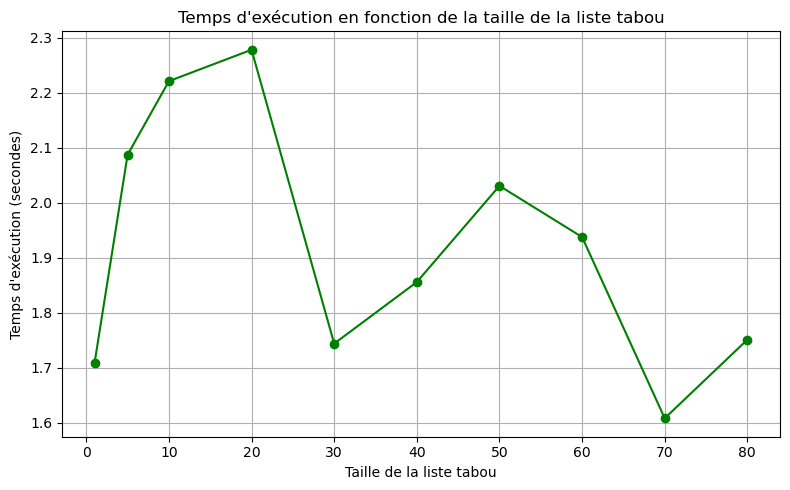

In [ ]:
def time_vs_tabu_list_size(graph_generator, algorithm_class, tabu_sizes, max_iterations, node_count=20, blocked_edge_percentage=10, costly_edge_percentage=10):
    times = []
    for size in tabu_sizes:
        try:
            graph = graph_generator(
                node=node_count,
                blocked_edge_percentage=blocked_edge_percentage,
                costly_edge_percentage=costly_edge_percentage
            )
            algorithm = algorithm_class(graph, max_iterations=max_iterations)
            algorithm.tabu_list_size = size  
            algorithm.convergence_threshold = 0
            algorithm.run()
            print(f"{algorithm.name} - taille liste tabou {size} : {algorithm.execution_time:.4f} sec")
            times.append(algorithm.execution_time)
        except Exception as e:
            print(f"Erreur avec taille liste tabou {size} : {e}")
            times.append(None)
    Plot.plot_time_vs_tabu_size(tabu_sizes, times)


def graph_generator(node=10, minimum_weight=1, maximum_weight=100, blocked_edge_percentage=0, costly_edge_percentage=0):
    # Graph generation
    graph = RandomGraph(node_number=node, min_weight=minimum_weight, max_weight=maximum_weight)
    # Filtration
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)
    return graph

tabu_sizes = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80]

time_vs_tabu_list_size(
    graph_generator=graph_generator,
    algorithm_class=lambda graph, max_iterations: TabuAlgo(graph, max_iterations=max_iterations),
    tabu_sizes=tabu_sizes,
    max_iterations=50,
    node_count=30,  
    blocked_edge_percentage=10,
    costly_edge_percentage=10
)


Le graphique du temps d'éxécution en fonction de la taille de la liste tabou varie énormément, donc **la taille de la liste tabou n'a pas d'impact sur le temps d'éxécution**

#### Variation du temps en fonction de la taille du nombre de véhicule

42d0923a-5570-420c-aa8c-fa843bc1ee85 - 1 véhicules : 14.6903 sec
d0591e1b-b63a-411b-bf70-f9e31ecb408d - 5 véhicules : 14.6927 sec
56067e1d-22b3-4ab2-9033-bbefd73229dc - 10 véhicules : 13.7699 sec
8e51df10-3910-4d0d-b86e-fb47543e00ea - 15 véhicules : 14.2557 sec
42a87e42-2e2c-4d45-823e-9122d4758479 - 20 véhicules : 12.6397 sec
760453a5-9500-422b-8fe6-ad167593770f - 25 véhicules : 13.8068 sec
38f8aa9e-8f39-4229-a5c8-bb8280ba0ec5 - 30 véhicules : 12.3692 sec
d99b95b2-a30d-4e45-ab7a-8de895c8fa21 - 35 véhicules : 10.8972 sec
d0408d35-0c98-4d88-817f-ca59c2154629 - 40 véhicules : 14.1908 sec
3acc375b-86fe-48af-bf37-b330d5716c0c - 45 véhicules : 14.8590 sec
8bd82bb2-ea8c-4e13-91ac-2b3139abc8b4 - 50 véhicules : 13.8216 sec


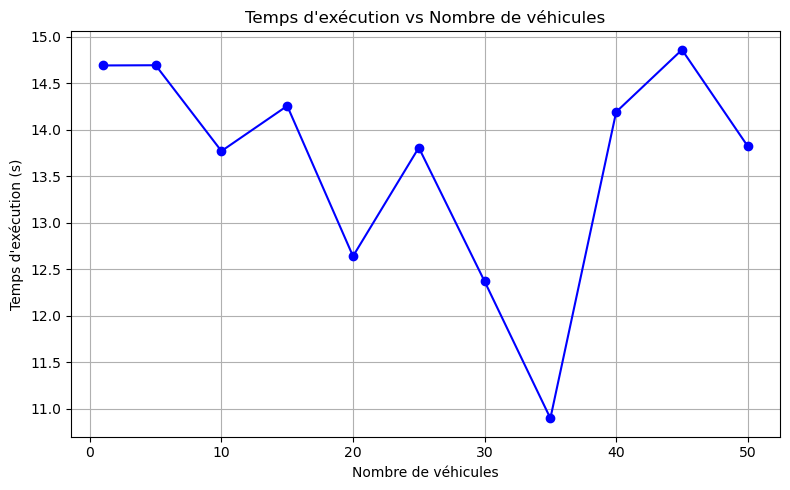

In [ ]:
def time_vs_vehicle_count(graph_generator, algorithm_class, vehicle_counts, max_iterations, node_count=30):
    times = []
    for v_count in vehicle_counts:
        try:
            graph = graph_generator(node=node_count)  # Génère un graphe fixe
            algorithm = algorithm_class(graph, max_iterations=max_iterations)
            algorithm.vehicle_count = v_count  # Suppose que ton algo accepte ce paramètre
            algorithm.convergence_threshold = 0
            algorithm.run()
            print(f"{algorithm.name} - {v_count} véhicules : {algorithm.execution_time:.4f} sec")
            times.append(algorithm.execution_time)
        except Exception as e:
            print(f"Erreur avec {v_count} véhicules : {e}")
            times.append(None)
    # Tracer les résultats
    Plot.plot_time_vs_vehicle_count(vehicle_counts, times)


def graph_generator(node=10, minimum_weight=1, maximum_weight=100, blocked_edge_percentage=0, costly_edge_percentage=0):
    # Graph generation
    graph = RandomGraph(node_number=node, min_weight=minimum_weight, max_weight=maximum_weight)
    # Filtration
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)
    return graph

vehicle_counts = [1, 5, 10, 15, 20, 25, 30, 35,40, 45, 50]

time_vs_vehicle_count(
    graph_generator=graph_generator,
    algorithm_class=lambda graph, max_iterations: TabuAlgo(graph, max_iterations=max_iterations),
    vehicle_counts=vehicle_counts,
    max_iterations=50,
    node_count=50  # Plus de nœuds pour un test plus réaliste avec plusieurs véhicules
)


Ce graphe du temps d'éxécution en fonction du nombre de véhicule nous **montre que le nombre de véhicule n'a pas d'impacte sur le temps d'exécution**. notre algorithme est donc optimisé quel que soit le nombre de véhicule.

#### Etude de trajectoire
Nous devons vérifier l'évolution de notre meilleur résultat au cours des itérations car nous devons nous assusurer de la qualité(l'optimalité) et fiabilité(la fréquence de solution de qualité) de notre solution. 

##### Variation de la distance en fonction du nombre d'itération (avec variation taille de graphes)



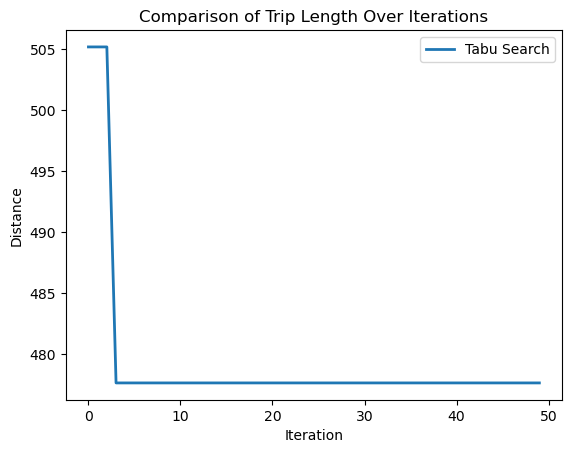

In [ ]:
# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

distance_over_iterations_comparison(graph= graph,algorithms=algorithms, single_plot=False)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


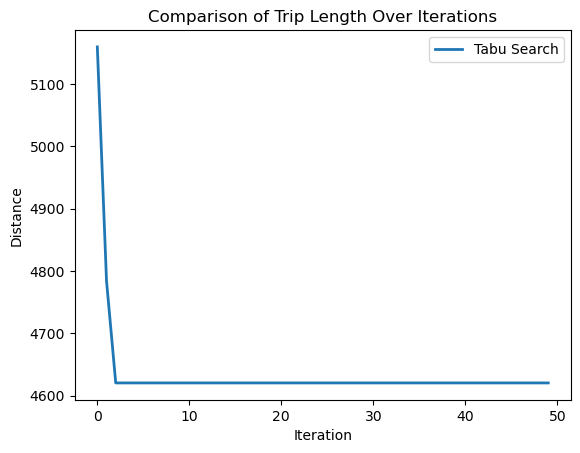

In [ ]:
# Graph generation
graph = RandomGraph(node_number=100,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

distance_over_iterations_comparison(graph= graph,algorithms=algorithms, single_plot=False)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


In [ ]:
def get_iteration_over_node_size(max_node_number = 50, threshold = 20, step = 10):
    if(max_node_number < 6):
        max_node_number=6
    iterations = []
    iteration_range = range(10,max_node_number + 2, step)
    for i in iteration_range:
        graph = RandomGraph(node_number=i,min_weight=1,max_weight=100)
        TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=1, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=10)
        TABU.run()
        iterations.append(TABU.execution_time)
        print(f"{i} node step realized on {max_node_number}")
    Plot.plot_iterations_over_node_sizes(iterations)



get_iteration_over_node_size(max_node_number = 50, threshold = 20, step = 5)




10 node step realized on 50
15 node step realized on 50
20 node step realized on 50
25 node step realized on 50


KeyboardInterrupt: 

Avec les graphes de la variation de la distance trouvée par rapport au nombre d'itération on remarque que **plus le nombre de sommets est élevé plus un nombre d'itération est nécessaire pour trouver la solution optimale.**

#### Variation de la distance en fonction de la taille de la liste tabou


#### Propositions d'améliorations
Notre algorihthme semble peut performant temporelement lorsque le nombre d'itération et de nodes augmentent fortement, on devrait se concentrer sur ces problèmes afin d'optimiser notre algorithme, de plus lors de la génération de solution avec de nombreuses arrêtes, le temps d'éxecution explose due à la génération possible de solution impossible, il faudrait limiter l'aléatoire de la génération d'une solution à l'ensemble des solutions possibles afin d'optimiser ce processus. Pour mettre en place cette optimisation il faudrait générer procéduralement notre solution en générant arêtes par arête en vérifiant les arêtes existantes.



## Métaheuristique 2 : Algorithme des colonies de fourmis
### Modélisation algorthmique   
L'algorithme des colonies de fourmis fonctionne de la manière suivante :

L’algorithme commence par initialiser les phéromones sur toutes les arêtes du graphe avec une valeur par défaut (1). Chaque fourmi démarre depuis un point de départ représentant le dépôt et construit une solution en visitant les noeds du graphe.

**Construction des solutions**
Chaque fourmi construit une solution en se déplaçant de noeud en noed. Le choix du prochain noeud est basé sur une probabilité calculée à partir des phéromones présentes sur les arêtes et de la distance entre les noeuds. Les noeuds avec plus de phéromones et une distance plus courte ont une probabilité plus élevée d’être choisis.

La probabilité qu'une fourmi se déplace de nœud i à nœud j est donnée par la formule suivante :

$P_{ij} = \frac{[\tau_{ij}]^\alpha \cdot [\eta_{ij}]^\beta}{\sum_{k \in \text{non visités}} [\tau_{ik}]^\alpha \cdot [\eta_{ik}]^\beta}$

Où :

( $\tau_{ij}$ ) : Intensité des phéromones sur l'arête ( (i, j) ).
( $\eta_{ij} = \frac{1}{d_{ij}}$ ) : Visibilité, inverse de la distance ( d_{ij} ).
( $\alpha$ ) : Influence des phéromones.
( $\beta$ ) : Influence de la distance.

**Évaluation des solutions**
Une fois que toutes les fourmis ont construit leurs solutions, celles-ci sont évaluées en fonction de la fonction de coût ($\sum_{k=1}^{n_v} TV \min \sum_{k=TV_1}^{TV_n} w(i, j)$ soit minimisé). Les solutions les plus courtes sont considérées comme meilleures.

**Mise à jour des phéromones**
Les phéromones sur les arêtes sont mises à jour de deux manières :

Évaporation : Une partie des phéromones s’évapore pour éviter une convergence prématurée.
Renforcement : Les arêtes utilisées par les meilleures solutions reçoivent un renforcement de phéromones, proportionnel à la qualité de la solution.

**Répétition sur n itérations**
Ce processus est répété pendant un nombre fixé d’itérations n. À chaque itération, les fourmis explorent de nouvelles solutions, et les phéromones sont mises à jour pour guider les prochaines explorations.

**Retour de la meilleure solution trouvée**
Une fois le nombre d’itérations terminé, l’algorithme renvoie la meilleure solution rencontrée au cours de la recherche. Il s’agit de la solution avec le coût total le plus faible.

### implémentation python

Implémentation Python
En Python, plusieurs paramètres ont été définis pour la classe de notre algorithme :

- num_ants : Nombre de fourmis utilisées à chaque itération.
- decay : Taux d’évaporation des phéromones.
- alpha : Influence des phéromones sur le choix des nœuds.
- beta : Influence de la distance sur le choix des nœuds.
- min_iterations : Nombre minimum d’itérations.
- max_iterations : Nombre maximum d’itérations.
- convergence_threshold : Nombre d’itérations consécutives sans amélioration avant d’arrêter l’exécution.

Exemple :

In [ ]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph

num_ants = 100
decay = 0.5
alpha = 1.0
beta = 2.0
min_iterations = 10
max_iterations = 100
convergence_threshold = 10

graph = RandomGraph(node_number=50, min_weight=1, max_weight=100)

aco = AcoAlgo(
    graph=graph,
    name="ACO",
    num_ants=num_ants,
    decay=decay,
    alpha=alpha,
    beta=beta,
    min_iterations=min_iterations,
    max_iterations=max_iterations,
    convergence_threshold=convergence_threshold,
)

aco.run()

print(f"Meilleure distance trouvée : {aco.distance}")
print(f"Chemin optimal : {aco.paths}")

Meilleure distance trouvée : 329.59208518977556
Chemin optimal : [[0, 42, 43, 39, 8, 46, 11, 6, 48, 40, 18, 27, 25, 20, 16, 28, 37, 15, 30, 47, 24, 13, 31, 35, 32, 33, 45, 38, 44, 7, 49, 36, 14, 2, 5, 26, 22, 19, 34, 9, 21, 23, 12, 3, 17, 4, 29, 10, 41, 1, 0]]


### Etude expérimentale

#### Plan d’expérience

Pour le plan d'experimentale, nous allons dans un premier temps chercher les paramètres optimums concernant le comportement des fourmis quant à leurs trajectoire soit :
- $\alpha$
- $\beta$
- $\rho$



In [ ]:
import numpy as np
import random
import pandas as pd
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph

# Paramètres d'exploration
alphas = np.linspace(0.1, 5.0, 10)
betas = np.linspace(0.1, 5.0, 10)
decays = np.linspace(0.1, 1.0, 10)

# Calcul du total d'itérations
total_iterations = len(alphas) * len(betas) * len(decays)
current_iteration = 0

# Stockage des résultats
results = []

# Exploration des combinaisons
def explore_parameters(graph = None):
    generate_graph = (graph == None)
    
    global current_iteration
    for decay in decays:
        for alpha in alphas:
            for beta in betas:
                current_iteration += 1
                if generate_graph:
                    graph = RandomGraph(node_number=15, min_weight=1, max_weight=100)
                graph.apply_edge_blocking(percentage=random.randint(0, 20))
                graph.apply_edge_costly(percentage=random.randint(0, 20))

                aco = AcoAlgo(
                    graph=graph,
                    name="ACO",
                    num_ants=100,
                    num_vehicles=3,
                    decay=decay,
                    alpha=alpha,
                    beta=beta,
                    min_iterations=0,
                    max_iterations=500,
                    convergence_threshold=10,
                )
                aco.run()

                distance = aco.distance
                results.append({
                    "alpha": alpha,
                    "beta": beta,
                    "decay": decay,
                    "distance": distance
                })

def show_best_parameters(top_n=5):
    df = pd.DataFrame(results)
    best = df.sort_values(by="distance").head(top_n)
    print("Meilleurs paramètres trouvés : ")
    print(best[["alpha", "beta", "decay", "distance"]].to_string(index=False))

    best_params = best.iloc[0][["alpha", "beta", "decay"]].to_dict()
    print("Meilleure combinaison : ")
    print(best_params)
explore_parameters()
show_best_parameters()

Meilleurs paramètres trouvés : 
   alpha     beta  decay   distance
5.000000 4.455556    0.5 193.112707
0.644444 2.277778    0.7 216.556927
4.455556 0.644444    1.0 230.510743
2.277778 1.733333    0.5 231.621415
0.100000 3.911111    0.3 233.790118
Meilleure combinaison : 
{'alpha': 5.0, 'beta': 4.455555555555556, 'decay': 0.5}


Nous allons verifier cette solution en réexucutant l'algorithme mais cette fois en ne générant pas de graphe aléatoire à chaque itération, afin de verifier si la solution est semblable

In [ ]:
test_graph = RandomGraph(node_number=15, min_weight=1, max_weight=100)
explore_parameters(test_graph)
show_best_parameters()

Meilleurs paramètres trouvés : 
   alpha     beta  decay   distance
5.000000 4.455556    0.5 193.112707
0.644444 2.277778    0.7 216.556927
4.455556 0.644444    1.0 230.510743
2.277778 1.733333    0.5 231.621415
0.100000 3.911111    0.3 233.790118
Meilleure combinaison : 
{'alpha': 5.0, 'beta': 4.455555555555556, 'decay': 0.5}


La solution est similaire, bien qu'elle pourrait être affinée par une exécution sur des graphes de taille variée, elle permet aux fourmis d'apporter un comportement permettant de minimiser la distance de la solution.

Nous allons donc utiliser :
- $\alpha = 5.0$
- $\beta = 4.45$
- $\rho = 0.5$

#### Etude de trajectoire

Avec ces paramètres, nous pouvons analyser :
- le temps d'execution selon le nombre de fourmis
- la distance obtenu pour un même graphe selon le nombre de fourmis

Num ants: 100, Execution time: 5.3148 seconds
Num ants: 200, Execution time: 10.4766 seconds
Num ants: 300, Execution time: 17.0230 seconds
Num ants: 400, Execution time: 18.9785 seconds
Num ants: 500, Execution time: 21.5845 seconds
Num ants: 600, Execution time: 26.0112 seconds
Num ants: 700, Execution time: 32.8947 seconds
Num ants: 800, Execution time: 34.3336 seconds
Num ants: 900, Execution time: 38.8212 seconds
Num ants: 1000, Execution time: 50.2935 seconds


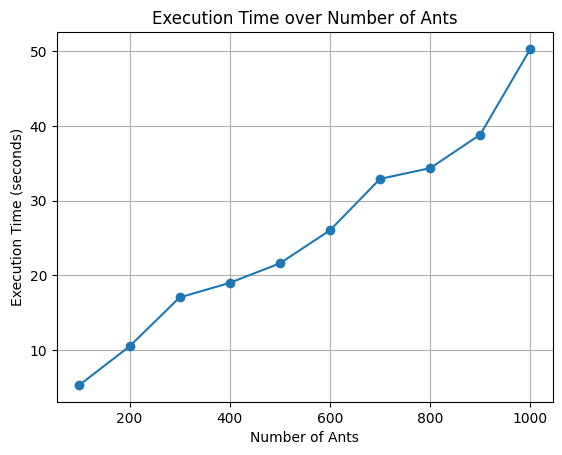

In [3]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

def execution_time_vs_num_ants(graph, num_ants_range, step=20, max_iterations=50):
    execution_times = []
    num_ants_values = range(num_ants_range[0], num_ants_range[1] + 1, step)
    
    for num_ants in num_ants_values:
        algorithm = AcoAlgo(
            graph=graph,
            name="ACO",
            num_ants=num_ants,
            decay=0.5,
            alpha=5.0,
            beta=4.45,
            min_iterations=10,
            max_iterations=max_iterations,
            convergence_threshold=10,
        )
        algorithm.run()
        execution_times.append(algorithm.execution_time)
        print(f"Num ants: {num_ants}, Execution time: {algorithm.execution_time:.4f} seconds")
    
    # Plot the results
    Plot.plot_num_ants_vs_execution_time(num_ants_values, execution_times)

graph = RandomGraph(node_number=50, min_weight=1, max_weight=100)
execution_time_vs_num_ants(graph, num_ants_range=(100, 1000), step=100)


Num ants: 100, Distance: 373.3820
Num ants: 200, Distance: 344.5922
Num ants: 300, Distance: 362.7063
Num ants: 400, Distance: 354.9671
Num ants: 500, Distance: 353.2413
Num ants: 600, Distance: 313.4870
Num ants: 700, Distance: 346.5173
Num ants: 800, Distance: 313.4870
Num ants: 900, Distance: 307.2460
Num ants: 1000, Distance: 331.7767


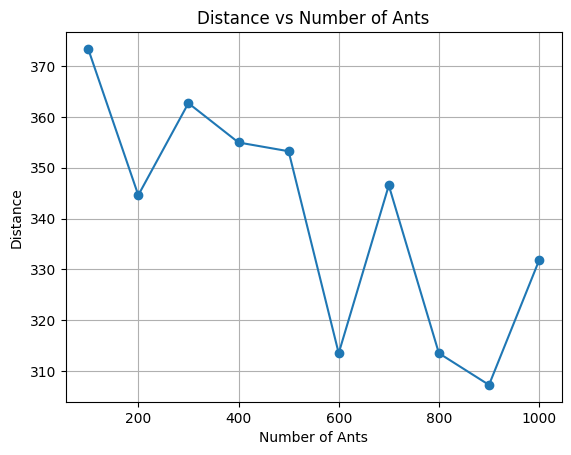

In [1]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

def distance_vs_num_ants(graph, num_ants_range, step=20, max_iterations=50):
    distances = []
    num_ants_values = range(num_ants_range[0], num_ants_range[1] + 1, step)
    
    for num_ants in num_ants_values:
        algorithm = AcoAlgo(
            graph=graph,
            name="ACO",
            num_ants=num_ants,
            decay=0.5,
            alpha=5.0,
            beta=4.45,
            min_iterations=10,
            max_iterations=max_iterations,
            convergence_threshold=10,
        )
        algorithm.run()
        distances.append(algorithm.distance)
        print(f"Num ants: {num_ants}, Distance: {algorithm.distance:.4f}")
    
    # Plot the results
    Plot.plot_num_ants_vs_distance(num_ants_values, distances)

graph = RandomGraph(node_number=50, min_weight=1, max_weight=100)
distance_vs_num_ants(graph, num_ants_range=(100, 1000), step=100)



Sur une même trajectoire de 50 villes à parcourir, le nombre de fourmis à tendance à decroitre la distance totale, mais n'est pas parfaitement linéaire, il n'y a pas un nombre $n$ de fourmis optimal pour chaque type de trajet, nous allons donc réaliser à nouveau notre analyse pour 100, 200 et 500 fourmis, pour differents types de graphes afin de calculer le temps mis et la distance trouvée.

Nodes: 10, Ants: 100, Execution time: 0.5440 seconds
Nodes: 10, Ants: 200, Execution time: 0.9208 seconds
Nodes: 10, Ants: 500, Execution time: 2.2608 seconds
Nodes: 20, Ants: 100, Execution time: 1.0361 seconds
Nodes: 20, Ants: 200, Execution time: 2.3105 seconds
Nodes: 20, Ants: 500, Execution time: 5.9320 seconds
Nodes: 30, Ants: 100, Execution time: 2.2151 seconds
Nodes: 30, Ants: 200, Execution time: 3.7801 seconds
Nodes: 30, Ants: 500, Execution time: 9.4378 seconds
Nodes: 40, Ants: 100, Execution time: 3.1554 seconds
Nodes: 40, Ants: 200, Execution time: 6.7947 seconds
Nodes: 40, Ants: 500, Execution time: 18.7817 seconds
Nodes: 50, Ants: 100, Execution time: 6.7060 seconds
Nodes: 50, Ants: 200, Execution time: 10.6964 seconds
Nodes: 50, Ants: 500, Execution time: 26.2896 seconds
Nodes: 60, Ants: 100, Execution time: 7.2024 seconds
Nodes: 60, Ants: 200, Execution time: 17.8160 seconds
Nodes: 60, Ants: 500, Execution time: 40.1837 seconds
Nodes: 70, Ants: 100, Execution time: 11.

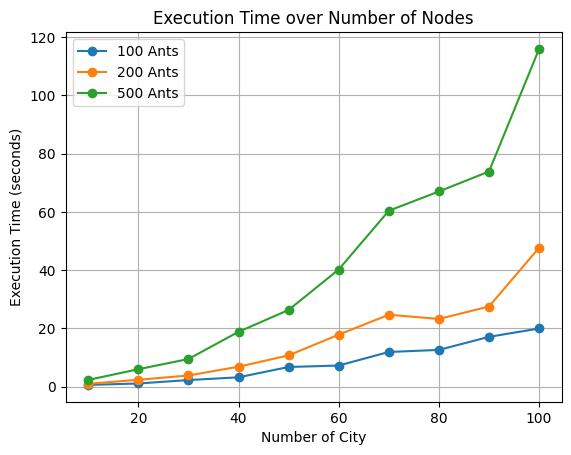

In [3]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

def execution_time_vs_nodes(num_nodes_range, num_ants_list, step=10, max_iterations=50):
    node_counts = range(num_nodes_range[0], num_nodes_range[1] + 1, step)
    results = {num_ants: [] for num_ants in num_ants_list}

    for num_nodes in node_counts:
        graph = RandomGraph(node_number=num_nodes, min_weight=1, max_weight=100)
        for num_ants in num_ants_list:
            algorithm = AcoAlgo(
                graph=graph,
                name=f"ACO_{num_ants}_ants",
                num_ants=num_ants,
                decay=0.5,
                alpha=5.0,
                beta=4.45,
                min_iterations=10,
                max_iterations=max_iterations,
                convergence_threshold=10,
            )
            algorithm.run()
            results[num_ants].append(algorithm.execution_time)
            print(f"Nodes: {num_nodes}, Ants: {num_ants}, Execution time: {algorithm.execution_time:.4f} seconds")

    # Plot the results
    Plot.plot_execution_time_vs_nodes(node_counts, results)

execution_time_vs_nodes(num_nodes_range=(10, 100), num_ants_list=[100, 200, 500], step=10, max_iterations=50)

Nodes: 10, Ants: 100, Distance: 218.2467
Nodes: 10, Ants: 200, Distance: 218.2467
Nodes: 10, Ants: 500, Distance: 218.2467
Nodes: 20, Ants: 100, Distance: 278.3911
Nodes: 20, Ants: 200, Distance: 260.2120
Nodes: 20, Ants: 500, Distance: 274.4515
Nodes: 30, Ants: 100, Distance: 253.5101
Nodes: 30, Ants: 200, Distance: 222.1850
Nodes: 30, Ants: 500, Distance: 253.5101
Nodes: 40, Ants: 100, Distance: 322.7273
Nodes: 40, Ants: 200, Distance: 322.7273
Nodes: 40, Ants: 500, Distance: 322.7273
Nodes: 50, Ants: 100, Distance: 278.4365
Nodes: 50, Ants: 200, Distance: 276.2522
Nodes: 50, Ants: 500, Distance: 275.8251
Nodes: 60, Ants: 100, Distance: 394.4551
Nodes: 60, Ants: 200, Distance: 389.0244
Nodes: 60, Ants: 500, Distance: 389.1045
Nodes: 70, Ants: 100, Distance: 324.7016
Nodes: 70, Ants: 200, Distance: 323.7932
Nodes: 70, Ants: 500, Distance: 326.8172
Nodes: 80, Ants: 100, Distance: 391.7371
Nodes: 80, Ants: 200, Distance: 383.5666
Nodes: 80, Ants: 500, Distance: 365.0786
Nodes: 90, Ants:

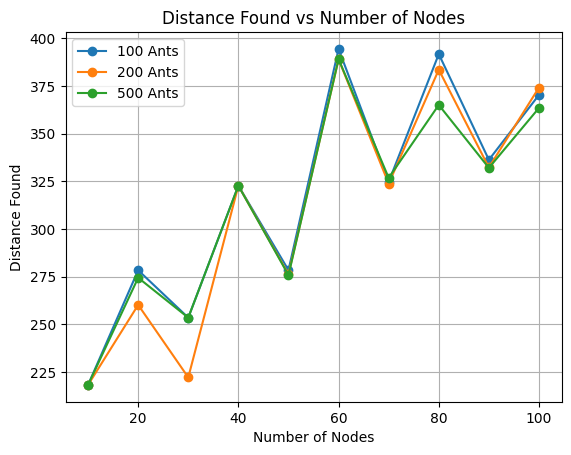

In [1]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

def distance_vs_nodes(num_nodes_range, num_ants_list, step=10, max_iterations=50):
    node_counts = range(num_nodes_range[0], num_nodes_range[1] + 1, step)
    results = {num_ants: [] for num_ants in num_ants_list}

    for num_nodes in node_counts:
        graph = RandomGraph(node_number=num_nodes, min_weight=1, max_weight=100)
        for num_ants in num_ants_list:
            algorithm = AcoAlgo(
                graph=graph,
                name=f"ACO_{num_ants}_ants",
                num_ants=num_ants,
                decay=0.5,
                alpha=5.0,
                beta=4.45,
                min_iterations=10,
                max_iterations=max_iterations,
                convergence_threshold=10,
            )
            algorithm.run()
            results[num_ants].append(algorithm.distance)
            print(f"Nodes: {num_nodes}, Ants: {num_ants}, Distance: {algorithm.distance:.4f}")

    # Plot the results
    Plot.plot_distance_vs_nodes(node_counts, results)

# Example usage
distance_vs_nodes(num_nodes_range=(10, 100), num_ants_list=[100, 200, 500], step=10, max_iterations=50)

Entre 10 à 100 villes visités, la distance trouvée est similaire peu importe le nombres de fourmis, cependant, l'algorithme avec 500 fourmis peut être jusqu'à 6 fois plus rapide que pour 100 fourmis.

Le choix optimal actuel est donc :
- $\alpha = 5.0$
- $\beta = 4.45$
- $\rho = 0.5$

Avec 100 fourmis

### Pistes d'améliorations 

#### Optimisation des paramètres
Les valeurs $\alpha$, $\beta$ et $\rho$ pourraient être utiliser dynamiquemenr au cours des itérations, par exemple augmenter $\alpha$ pour renforcer l'impact des phéromones lorsque l'algorithme converge trop lentement, ou diminuer $\beta$ pour favoriser l'exploration.

#### Nombre adaptatif des fourmis
Le nombre de fourmis pourrait être initialement élevé afin de couvrir une plus large zone, puis reduire le nombre lors de la convergence pour accélerer l'algorithme

#### Parallélisation
Réaliser les calculs des fourmis pourraient être effectués en parallèles afin d'optimiser le temps de calcul


## Métaheuristique 3 : Algorithme génétique
### Modélisation algorthmique   
### implémentation python

### Etude expérimentale

#### Plan d’expérience

#### Etude de trajectoire

#### Etude statistique

#### propositions d'amélioration




# Étude statistique – Conclusion
L'objectif de cette étude statistique était de déterminer quel algorithme est le plus adapté à notre problème. Pour cela, nous avons comparé plusieurs algorithmes à travers de multiples itérations sur des problèmes similaires, afin d'identifier celui qui est le plus rapide à trouver une solution et celui qui fournit les résultats les plus optimisés.

Nous avons calculé la moyenne et l’écart type des résultats optimaux obtenus par chaque algorithme, ce qui nous a permis de visualiser leurs performances à l’aide de diagrammes en boîte (voir ci-dessus).

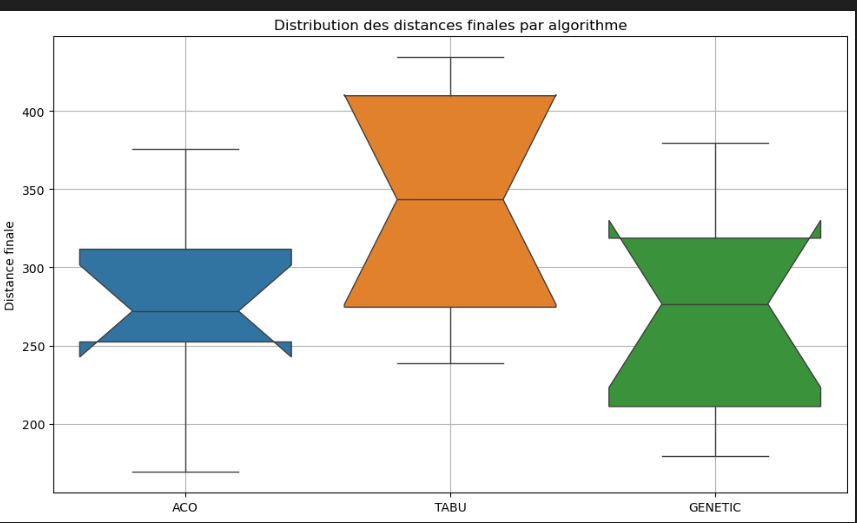
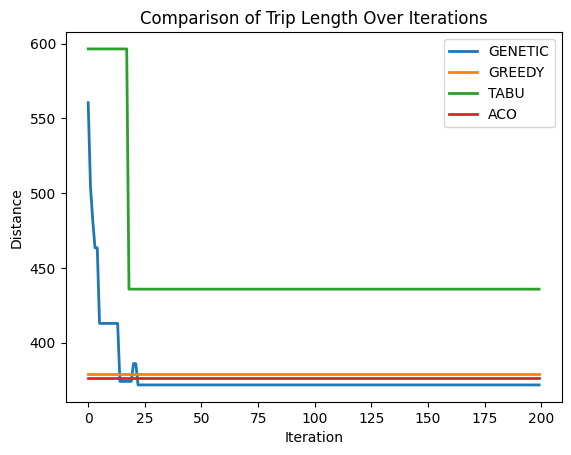

À l’issue de ces expérimentations, nous pouvons conclure que l’algorithme génétique est celui qui, après de nombreuses itérations, parvient le plus souvent à une solution optimale. Cependant, ses résultats manquent de régularité : il présente une grande variabilité entre les solutions qu’il considère comme optimales à différents instants.

Sur ce point, l’algorithme des fourmis se distingue par sa stabilité. Comme le montrent les diagrammes en boîte, ses résultats sont généralement plus constants et souvent proches de l’optimum. Il constitue donc un meilleur choix si la régularité des performances est un critère important.



# Bibliographie
* [TSP wiki](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce)
* [(TSP) exemple](https://docs.mosek.com/latest/dotnetfusion/case-studies-tsp.html)
* [VRP](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_tourn%C3%A9es_de_v%C3%A9hicules)

* [Réductions polynomiales](https://datamove.imag.fr/denis.trystram/SupportsDeCours/lesson4reductions.pdf)

* [Les 21 problèmes NP-complets de Karp](https://fr.wikipedia.org/wiki/21_probl%C3%A8mes_NP-complets_de_Karp)

* [The Complexity of Theorem-Proving Procedures](https://www.inf.unibz.it/~calvanese/teaching/14-15-tc/material/cook-1971-NP-completeness-of-SAT.pdf)

* [REDUCIBILITY AMONG COMBINATORIAL PROBLEM](https://cgi.di.uoa.gr/~sgk/teaching/grad/handouts/karp.pdf)

